In [1]:
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv('Data Faskes BPJS 2019.csv')
df.head()

,NoLink,Provinsi,KotaKab,Link,TipeFaskes,No,KodeFaskes,NamaFaskes,LatLongFaskes,AlamatFaskes,TelpFaskes
0,0,Nanggroe Aceh Darussalam,Kode Faskes dan Alamat Rumah Sakit BPJS di Kot...,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,1,0001R001,RSU Cut Nyak Dhien\r\n \r\n...,"http://maps.google.co.id/?q=4.488058,97.947963",Jl. Tm Bahrum No. 1 Langsa,\r\n 0641-0621039\r\n
1,0,Nanggroe Aceh Darussalam,Kode Faskes dan Alamat Rumah Sakit BPJS di Kot...,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,2,0001R004,RSU Cut Meutia Langsa\r\n \...,"http://maps.google.co.id/?q=4.488088,97.947781",Jl.Garuda Kebun Baru Langsa,\r\n 0641- 4840076\r\n
2,0,Nanggroe Aceh Darussalam,Kode Faskes dan Alamat Rumah Sakit BPJS di Kot...,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,3,0105R001,RSUD Langsa\r\n \r\n ...,"http://maps.google.co.id/?q=4.472208,97.975533",Jln.A.Yani No. 1 Langsa,\r\n 0641-22051\r\n
3,0,Nanggroe Aceh Darussalam,Kode Faskes dan Alamat Rumah Sakit BPJS di Kot...,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,4,0105R013,RSU Ummi \r\n \r\n ...,"http://maps.google.co.id/?q=4.470376,97.991915",Jln. Prof. A. Madjid Ibrahim,\r\n 0641-22886\r\n
4,0,Nanggroe Aceh Darussalam,Kode Faskes dan Alamat Rumah Sakit BPJS di Kot...,https://lovia.life/id/health/bpjs/area/kota-la...,Puskesmas,1,00010001,Langsa Lama\r\n \r\n ...,"http://maps.google.co.id/?q=4.478172,97.949988",Gampong Meurandeh Dayah,\r\n 0641-064121218\r\n


In [2]:
#Cleaning function

def cleanNama(row):
    str = row.replace('Kode Faskes dan Alamat Rumah Sakit BPJS di','')
    return str

def removeSpace(row):
    str = " ".join(row.split())
    return str

In [3]:
df['KotaKab'] = df['KotaKab'].apply(removeSpace).apply(cleanNama)
df['NamaFaskes'] = df['NamaFaskes'].apply(removeSpace)
df['TelpFaskes'] = df['TelpFaskes'].apply(removeSpace)
df.drop(['Link', 'NoLink', 'No'], axis=1, inplace=True)

df.head()

,Provinsi,KotaKab,TipeFaskes,KodeFaskes,NamaFaskes,LatLongFaskes,AlamatFaskes,TelpFaskes
0,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,0001R001,RSU Cut Nyak Dhien,"http://maps.google.co.id/?q=4.488058,97.947963",Jl. Tm Bahrum No. 1 Langsa,0641-0621039
1,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,0001R004,RSU Cut Meutia Langsa,"http://maps.google.co.id/?q=4.488088,97.947781",Jl.Garuda Kebun Baru Langsa,0641- 4840076
2,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,0105R001,RSUD Langsa,"http://maps.google.co.id/?q=4.472208,97.975533",Jln.A.Yani No. 1 Langsa,0641-22051
3,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,0105R013,RSU Ummi,"http://maps.google.co.id/?q=4.470376,97.991915",Jln. Prof. A. Madjid Ibrahim,0641-22886
4,Nanggroe Aceh Darussalam,Kota Langsa,Puskesmas,00010001,Langsa Lama,"http://maps.google.co.id/?q=4.478172,97.949988",Gampong Meurandeh Dayah,0641-064121218


In [4]:
import re
import numpy as np
import pandas as pd

def searchLatLong(row):
    str = re.search('(-?([0-9]{1}|[0-9]0|[1-8]{1,2}).[0-9]{1,6},(-?(1[0-8]{1,2}|9[1-9]{1}).[1-9]{1,6}))', row)
    if str:
        return str.group()
    return np.NaN

# Menggunakan fungsi searchLatLong untuk mencari LatLongFaskes yang sesuai
df['LatLongFaskes'] = df['LatLongFaskes'].apply(searchLatLong)

lat = []
lon = []

for row in df['LatLongFaskes']:
    try:
        latitude = float(row.split(',')[0])
        longitude = float(row.split(',')[1])
        if -90.0 <= latitude <= 90.0:
            lat.append(latitude)
        else:
            lat.append(np.NaN)

        if -180 <= longitude <= 180:
            lon.append(longitude)
        else:
            lon.append(np.NaN)
    except:
        lat.append(np.NaN)
        lon.append(np.NaN)

# Menambahkan kolom Latitude dan Longitude ke dataset
df['Latitude'] = lat
df['Longitude'] = lon

# Menghapus kolom LatLongFaskes
df.drop(['LatLongFaskes'], axis=1, inplace=True)

# Menampilkan hasil
df.head()

,Provinsi,KotaKab,TipeFaskes,KodeFaskes,NamaFaskes,AlamatFaskes,TelpFaskes,Latitude,Longitude
0,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,0001R001,RSU Cut Nyak Dhien,Jl. Tm Bahrum No. 1 Langsa,0641-0621039,4.488058,97.947963
1,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,0001R004,RSU Cut Meutia Langsa,Jl.Garuda Kebun Baru Langsa,0641- 4840076,4.488088,97.947781
2,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,0105R001,RSUD Langsa,Jln.A.Yani No. 1 Langsa,0641-22051,4.472208,97.975533
3,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,0105R013,RSU Ummi,Jln. Prof. A. Madjid Ibrahim,0641-22886,4.470376,97.991915
4,Nanggroe Aceh Darussalam,Kota Langsa,Puskesmas,00010001,Langsa Lama,Gampong Meurandeh Dayah,0641-064121218,4.478172,97.949988


In [5]:
# Memeriksa missing value
for column in df.columns:
    missing_values = df[column].isnull().sum()
    if missing_values > 0:
        print('\033[1m', '\33[31m')
        print("{} terdapat {} missing value(s)".format(column, missing_values))
    else:
        print('\033[1m', '\33[34m')
        print("{} tidak terdapat missing value!".format(column))

# Memeriksa data redundan
duplicates = df.duplicated()
if duplicates.any():
    duplicate_rows = df[duplicates]
    print('\033[1m', '\33[31m')
    print("Data memiliki {} baris redundan:".format(len(duplicate_rows)))
    print(duplicate_rows)
else:
    print('\033[1m', '\33[32m')
    print("Data tidak memiliki baris redundan!")

 
Provinsi tidak terdapat missing value!
 
KotaKab tidak terdapat missing value!
 
TipeFaskes tidak terdapat missing value!
 
KodeFaskes tidak terdapat missing value!
 
NamaFaskes tidak terdapat missing value!
 
AlamatFaskes tidak terdapat missing value!
 
TelpFaskes tidak terdapat missing value!
 
Latitude terdapat 12640 missing value(s)
 
Longitude terdapat 9428 missing value(s)
 
Data tidak memiliki baris redundan!


# **EDA**

In [6]:
# Menampilkan informasi umum tentang dataset
print("Info dataset:")
df.info()

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29157 entries, 0 to 29156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Provinsi      29157 non-null  object 
 1   KotaKab       29157 non-null  object 
 2   TipeFaskes    29157 non-null  object 
 3   KodeFaskes    29157 non-null  object 
 4   NamaFaskes    29157 non-null  object 
 5   AlamatFaskes  29157 non-null  object 
 6   TelpFaskes    29157 non-null  object 
 7   Latitude      16517 non-null  float64
 8   Longitude     19729 non-null  float64
dtypes: float64(2), object(7)
memory usage: 2.0+ MB


In [7]:
# Jumlah unik untuk kolom kategorikal
categorical_columns = ['Provinsi', 'KotaKab', 'TipeFaskes']
for column in categorical_columns:
    unique_values = df[column].nunique()
    print(f"\nJumlah unik {column}: {unique_values}")
    print(df[column].value_counts())


Jumlah unik Provinsi: 34
Jawa Tengah                 3688
Jawa Barat                  3683
Jawa Timur                  3548
Sumatera Utara              1628
Sulawesi Selatan            1155
Dki Jakarta                  995
Sumatera Selatan             993
Banten                       913
Lampung                      784
Nanggroe Aceh Darussalam     776
Bali                         765
Riau                         729
Nusa Tenggara Timur          722
Sumatera Barat               721
Papua                        712
Kalimantan Selatan           671
Kalimantan Timur             634
Sulawesi Utara               543
D I Yogyakarta               534
Kalimantan Barat             531
Sulawesi Tenggara            500
Jambi                        446
Kalimantan Tengah            418
Nusa Tenggara Barat          393
Bengkulu                     390
Sulawesi Tengah              386
Maluku                       334
Kepulauan Riau               319
Papua Barat                  278
Maluku Utara     

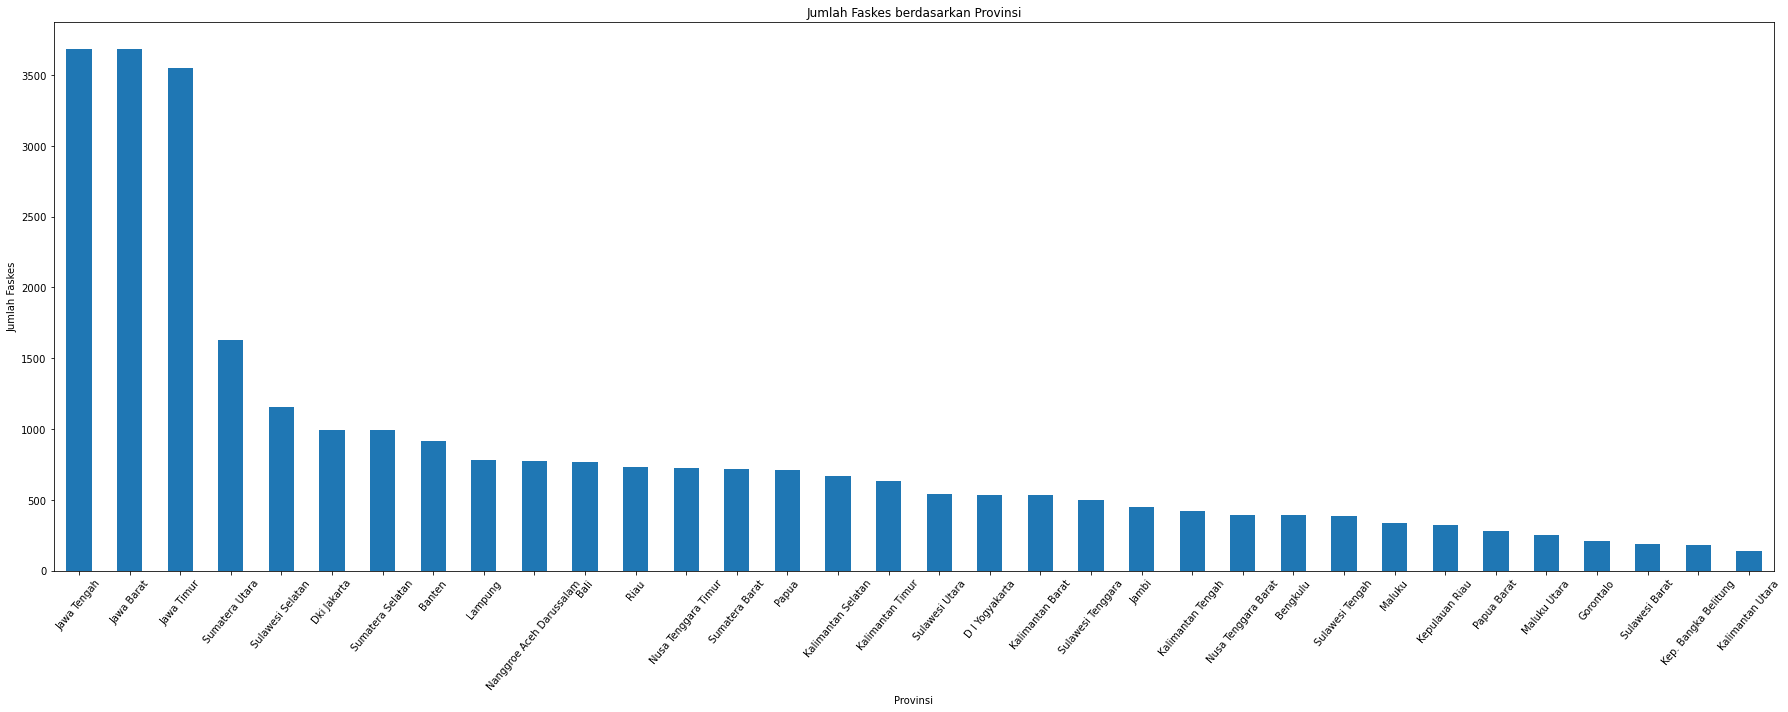

In [8]:
# Visualisasi jumlah faskes berdasarkan provinsi
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
df['Provinsi'].value_counts().plot(kind='bar')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Faskes')
plt.title('Jumlah Faskes berdasarkan Provinsi')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [9]:
!pip install folium

In [10]:
import folium
from folium import plugins

# Menentukan batas-batas geografis Indonesia
indonesia_bounds = [
    [-11.01, 95.29], # Batas selatan
    [5.89, 141.01]   # Batas utara
]

# Menghapus data yang diluar batas geografis Indonesia
df_map = df[(df['Latitude'] >= indonesia_bounds[0][0]) &
             (df['Latitude'] <= indonesia_bounds[1][0]) &
             (df['Longitude'] >= indonesia_bounds[0][1]) &
             (df['Longitude'] <= indonesia_bounds[1][1])].dropna()

# Menentukan titik tengah peta
indonesia_lat, indonesia_lng = -2.548926, 118.014863

# Inisialisasi objek peta folium
my_map = folium.Map(location=[indonesia_lat, indonesia_lng], zoom_start=5)

# Menambahkan semua titik dari file ke objek peta menggunakan FastMarkerCluster
my_map.add_child(plugins.FastMarkerCluster(df_map[['Latitude', 'Longitude']].values.tolist()))

# Menampilkan peta
my_map


In [11]:
import folium
from folium import plugins

# Menentukan batas-batas geografis Indonesia
indonesia_bounds = [
    [-11.01, 95.29], # Batas selatan
    [5.89, 141.01]   # Batas utara
]

# Menghapus data yang diluar batas geografis Indonesia
df_map = df[(df['Latitude'] >= indonesia_bounds[0][0]) &
             (df['Latitude'] <= indonesia_bounds[1][0]) &
             (df['Longitude'] >= indonesia_bounds[0][1]) &
             (df['Longitude'] <= indonesia_bounds[1][1])].dropna()

# Menentukan titik tengah peta
indonesia_lat, indonesia_lng = -2.548926, 118.014863

# Inisialisasi objek peta folium
my_map = folium.Map(location=[indonesia_lat, indonesia_lng], zoom_start=5)

# Menambahkan semua titik dari file ke objek peta menggunakan FastMarkerCluster
my_map.add_child(plugins.FastMarkerCluster(df_map[['Latitude', 'Longitude']].values.tolist()))

# Menampilkan peta
my_map

# Menghitung jumlah data
total_data_count = df.shape[0]
geographically_available_data_count = df_map.shape[0]
geographically_unavailable_data_count = total_data_count - geographically_available_data_count

print('\nTotal data fasilitas: ', total_data_count)
print('\nTotal fasilitas yang dapat ditampilkan di map: ', geographically_available_data_count)
print('\nTotal fasilitas yang tidak dapat ditampilkan di map: ', geographically_unavailable_data_count)


Total data fasilitas:  29157

Total fasilitas yang dapat ditampilkan di map:  16460

Total fasilitas yang tidak dapat ditampilkan di map:  12697


In [12]:
data_kotakab = df['KotaKab'].value_counts().rename_axis('KotaKab').reset_index(name='Jumlah')
data_kotakab.head()

,KotaKab,Jumlah
0,Kota Surabaya,364
1,Kota Semarang,305
2,Kab. Bogor,298
3,Kota Makassar,292
4,Kota Palembang,288


In [13]:
# Mengambil latitude dan longitude data per kota/kabupaten
kabkota = []
prov = []
latk = []
lonk = []

data_n = df.dropna() #hapus kota/kab tanpa latitude/longitude agar data dapat dibuat map

for prv, kk, ltk, lnk in zip(data_n['Provinsi'], data_n['KotaKab'], data_n['Latitude'], data_n['Longitude']):
    if (not(kk in kabkota) and not(ltk == np.NaN) and not(lnk == np.NaN)):
        prov.append(prv)
        kabkota.append(kk)
        latk.append(ltk)
        lonk.append(lnk)

print(len(kabkota))

data_map = pd.DataFrame(list(zip(prov, kabkota, latk, lonk)), columns=['Provinsi', 'KotaKab', 'Latitude', 'Langitude'])
data_map.head()

460


,Provinsi,KotaKab,Latitude,Langitude
0,Nanggroe Aceh Darussalam,Kota Langsa,4.488058,97.947963
1,Nanggroe Aceh Darussalam,Kab. Gayo Lues,4.059445,97.463333
2,Nanggroe Aceh Darussalam,Kab. Aceh Selatan,3.111916,97.368642
3,Nanggroe Aceh Darussalam,Kab. Aceh Tenggara,3.496266,97.800000
4,Nanggroe Aceh Darussalam,Kab. Aceh Timur,4.961196,97.762670


In [14]:
merged = pd.merge(data_map, data_kotakab, on='KotaKab')
merged.count()

Provinsi     460
KotaKab      460
Latitude     460
Langitude    460
Jumlah       460
dtype: int64

# **KLASTERING**

## **K-MEANS**

In [15]:
from sklearn.cluster import KMeans

# Mengambil data jumlah faskes per kota/kabupaten
data_cluster = merged[['Jumlah']]

# Melakukan klastering dengan K-Means
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data_cluster)

# Menambahkan label klaster ke data_cluster
data_cluster['Cluster'] = kmeans.labels_

# Memasukkan label klaster ke dalam data_map
data_map['Cluster'] = data_cluster['Cluster']

# Membuat peta dengan pewarnaan berdasarkan klaster
cluster_map = folium.Map(location=[data_n['Latitude'].mean(), data_n['Longitude'].mean()], zoom_start=6, tiles='Stamen Toner')

colors = ['red', 'blue']

for lat, lon, prov, kotakab, jml, cluster in zip(merged['Latitude'], merged['Langitude'], merged['Provinsi'], merged['KotaKab'], merged['Jumlah'], data_map['Cluster']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Provinsi</strong>: ' + str(prov) + '<br>'
                                '<strong>Kota/Kab</strong>: ' + str(kotakab) + '<br>'
                                '<strong>Jumlah</strong>: ' + str(jml) + '<br>'
                                '<strong>Cluster</strong>: ' + str(cluster)),
                        color=colors[cluster],
                        fill_color=colors[cluster],
                        fill_opacity=0.3).add_to(cluster_map)
cluster_map


C:\Users\Sandria\AppData\Local\Temp/ipykernel_32132/399263438.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['Cluster'] = kmeans.labels_


In [16]:
# Membuat peta dengan pewarnaan berdasarkan klaster
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import folium


# Mengambil data jumlah faskes per kota/kabupaten
data_cluster = merged[['Jumlah']]

# Melakukan klastering dengan K-Means
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data_cluster)

# Menambahkan label klaster ke data_cluster
data_cluster['Cluster'] = kmeans.labels_

cluster_map = folium.Map(location=[data_n['Latitude'].mean(), data_n['Longitude'].mean()], zoom_start=6, tiles='Stamen Terrain')

colors = ['red', 'blue']

for lat, lon, prov, kotakab, jml, cluster in zip(merged['Latitude'], merged['Langitude'], merged['Provinsi'], merged['KotaKab'], merged['Jumlah'], data_map['Cluster']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Provinsi</strong>: ' + str(prov) + '<br>'
                                '<strong>Kota/Kab</strong>: ' + str(kotakab) + '<br>'
                                '<strong>Jumlah</strong>: ' + str(jml) + '<br>'
                                '<strong>Cluster</strong>: ' + str(cluster)),
                        color=colors[cluster],
                        fill_color=colors[cluster],
                        fill_opacity=0.3).add_to(cluster_map)
cluster_map

C:\Users\Sandria\AppData\Local\Temp/ipykernel_32132/2712604975.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['Cluster'] = kmeans.labels_


### Evaluasi Silhoutte Score K-Means

In [17]:
# Evaluasi model dengan silhouette score
kmeans_score = silhouette_score(data_cluster, kmeans.labels_)

print("Silhouette Score K-Means:", kmeans_score)

Silhouette Score K-Means: 0.7512643127841443


C:\Users\Sandria\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


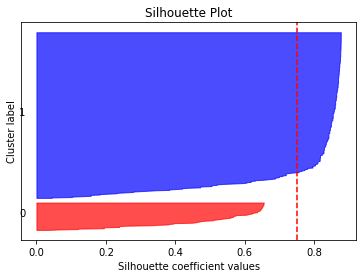

Silhouette Score: 0.7512643127841443


In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import folium
import matplotlib.pyplot as plt
import numpy as np

# Mengambil data jumlah faskes per kota/kabupaten
data_cluster = merged[['Jumlah']]

# Melakukan klastering dengan K-Means
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data_cluster)

# Menambahkan label klaster ke data_cluster
data_cluster.loc[:, 'Cluster'] = kmeans.labels_

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(data_cluster, kmeans.labels_)

# Visualisasi peta dengan pewarnaan berdasarkan klaster
cluster_map = folium.Map(location=[data_n['Latitude'].mean(), data_n['Longitude'].mean()], zoom_start=6, tiles='Stamen Terrain')

colors = ['red', 'blue']

for lat, lon, prov, kotakab, jml, cluster in zip(merged['Latitude'], merged['Langitude'], merged['Provinsi'], merged['KotaKab'], merged['Jumlah'], data_map['Cluster']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Provinsi</strong>: ' + str(prov) + '<br>'
                                '<strong>Kota/Kab</strong>: ' + str(kotakab) + '<br>'
                                '<strong>Jumlah</strong>: ' + str(jml) + '<br>'
                                '<strong>Cluster</strong>: ' + str(cluster)),
                        color=colors[cluster],
                        fill_color=colors[cluster],
                        fill_opacity=0.3).add_to(cluster_map)

# Visualisasi grafik Silhouette Score
fig, ax = plt.subplots(figsize=(6, 4))
cluster_labels = np.unique(kmeans.labels_)
silhouette_values = silhouette_samples(data_cluster, kmeans.labels_)

y_lower = 10
for i, label in enumerate(cluster_labels):
    cluster_silhouette_values = silhouette_values[kmeans.labels_ == label]
    cluster_silhouette_values.sort()
    cluster_size = cluster_silhouette_values.shape[0]
    y_upper = y_lower + cluster_size

    color = colors[label]
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(label))
    y_lower = y_upper + 10

ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.set_title("Silhouette Plot")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.yaxis.set_ticks([])
plt.show()

print("Silhouette Score:", silhouette_avg)

## **Perbandingan Metode lain menggunakan Agglomerative Clustering**

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Mengambil data jumlah faskes per kota/kabupaten
data_cluster = merged[['Jumlah']]

# Melakukan klastering dengan Agglomerative Clustering
n_clusters = 2  # Jumlah klaster yang diinginkan
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
agglomerative.fit(data_cluster)

# Menambahkan label klaster ke data_cluster
data_cluster['Cluster'] = agglomerative.labels_


# Visualisasi peta dengan pewarnaan berdasarkan klaster
cluster_map = folium.Map(location=[data_n['Latitude'].mean(), data_n['Longitude'].mean()], zoom_start=6, tiles='Stamen Terrain')

colors = ['red', 'blue']

for lat, lon, prov, kotakab, jml, cluster in zip(merged['Latitude'], merged['Langitude'], merged['Provinsi'], merged['KotaKab'], merged['Jumlah'], data_cluster['Cluster']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Provinsi</strong>: ' + str(prov) + '<br>'
                                '<strong>Kota/Kab</strong>: ' + str(kotakab) + '<br>'
                                '<strong>Jumlah</strong>: ' + str(jml) + '<br>'
                                '<strong>Cluster</strong>: ' + str(cluster)),
                        color=colors[cluster],
                        fill_color=colors[cluster],
                        fill_opacity=0.3).add_to(cluster_map)

cluster_map


C:\Users\Sandria\AppData\Local\Temp/ipykernel_32132/1651705024.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['Cluster'] = agglomerative.labels_


### Evaluasi Silhouette Score Agglomerative

In [20]:
# Evaluasi model dengan silhouette score
agglomerative_score = silhouette_score(data_cluster, agglomerative.labels_)
print("Silhouette Score Agglomerative Clustering:", agglomerative_score)

Silhouette Score Agglomerative Clustering: 0.7313862574589398


C:\Users\Sandria\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


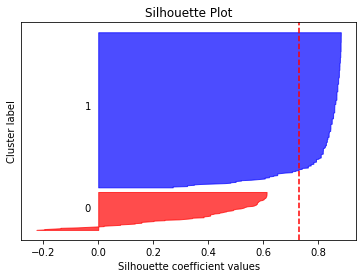

Silhouette Score: 0.7313862574589398


In [21]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import folium
import matplotlib.pyplot as plt
import numpy as np

# Mengambil data jumlah faskes per kota/kabupaten
data_cluster = merged[['Jumlah']]

# Melakukan klastering dengan Agglomerative Clustering
n_clusters = 2
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
agglomerative.fit(data_cluster)

# Menambahkan label klaster ke data_cluster
data_cluster.loc[:, 'Cluster'] = agglomerative.labels_

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(data_cluster, agglomerative.labels_)

# Visualisasi peta dengan pewarnaan berdasarkan klaster
cluster_map = folium.Map(location=[data_n['Latitude'].mean(), data_n['Longitude'].mean()], zoom_start=6, tiles='Stamen Terrain')

colors = ['red', 'blue']

for lat, lon, prov, kotakab, jml, cluster in zip(merged['Latitude'], merged['Langitude'], merged['Provinsi'], merged['KotaKab'], merged['Jumlah'], data_map['Cluster']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Provinsi</strong>: ' + str(prov) + '<br>'
                                '<strong>Kota/Kab</strong>: ' + str(kotakab) + '<br>'
                                '<strong>Jumlah</strong>: ' + str(jml) + '<br>'
                                '<strong>Cluster</strong>: ' + str(cluster)),
                        color=colors[cluster],
                        fill_color=colors[cluster],
                        fill_opacity=0.3).add_to(cluster_map)

# Visualisasi grafik Silhouette Score
fig, ax = plt.subplots(figsize=(6, 4))
cluster_labels = np.unique(agglomerative.labels_)
silhouette_values = silhouette_samples(data_cluster, agglomerative.labels_)

y_lower = 10
for i, label in enumerate(cluster_labels):
    cluster_silhouette_values = silhouette_values[agglomerative.labels_ == label]
    cluster_silhouette_values.sort()
    cluster_size = cluster_silhouette_values.shape[0]
    y_upper = y_lower + cluster_size

    color = colors[label]
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(label))
    y_lower = y_upper + 10

ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.set_title("Silhouette Plot")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.yaxis.set_ticks([])
plt.show()

print("Silhouette Score:", silhouette_avg)

## **Hasil Pebandingan Algoritma K-Means dengan Agglomerative**

Silhouette Score K-Means: 0.751243225305912
Silhouette Score Agglomerative Clustering: 0.7313862574589398


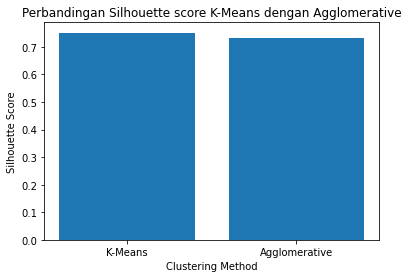

In [22]:
import matplotlib.pyplot as plt

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data_cluster)
kmeans_score = silhouette_score(data_cluster, kmeans.labels_)

# Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=2)
agglomerative.fit(data_cluster)
agglomerative_score = silhouette_score(data_cluster, agglomerative.labels_)

# Menampilkan Silhouette Score
print("Silhouette Score K-Means:", kmeans_score)
print("Silhouette Score Agglomerative Clustering:", agglomerative_score)

# Membuat grafik perbandingan Silhouette Score
labels = ['K-Means', 'Agglomerative']
scores = [kmeans_score, agglomerative_score]

plt.bar(labels, scores)
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.title('Perbandingan Silhouette score K-Means dengan Agglomerative')
plt.show()

## **Hasil Klasterisasi**

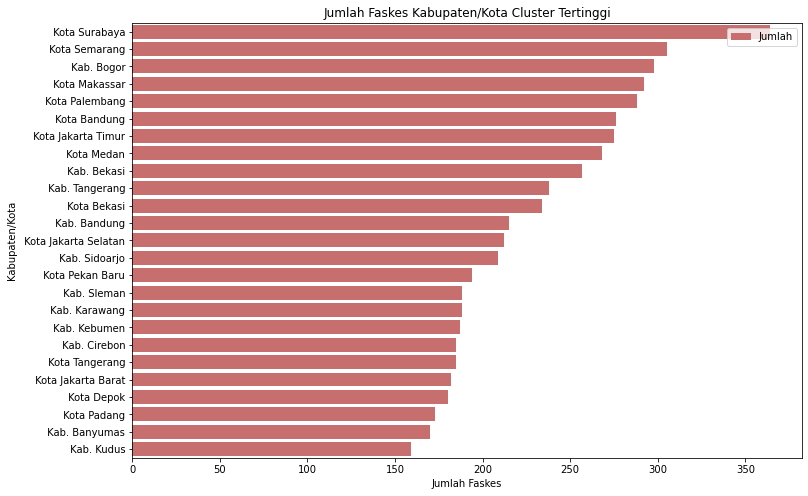

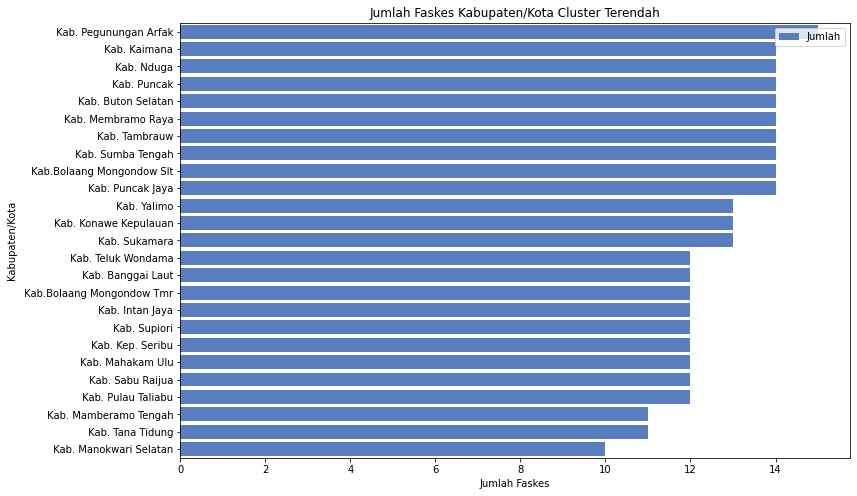

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing data
data_kotakab = df['KotaKab'].value_counts().reset_index()
data_kotakab.columns = ['KotaKab', 'Jumlah']

# K-means clustering
features = data_kotakab[['Jumlah']]
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features)
labels = kmeans.labels_

# Add Cluster column to the dataframe
data_kotakab['Cluster'] = labels

# Sort data by Jumlah in descending order
data_kotakab = data_kotakab.sort_values(by='Jumlah', ascending=False)

# Create a temporary dataframe for visualization
temp_data = pd.DataFrame({'KotaKab': data_kotakab['KotaKab'], 'Jumlah': data_kotakab['Jumlah']})

# Plotting the bar chart for highest faskes
f, ax = plt.subplots(figsize=(12, 8))
sns.set_color_codes("muted")
sns.barplot(x="Jumlah", y="KotaKab", data=temp_data[:25], label="Jumlah", color="r")
plt.xlabel('Jumlah Faskes')
plt.ylabel('Kabupaten/Kota')
plt.title('Jumlah Faskes Kabupaten/Kota Cluster Tertinggi')
plt.legend(loc='upper right')
plt.show()

# Plotting the bar chart for lowest faskes
f, ax = plt.subplots(figsize=(12, 8))
sns.set_color_codes("muted")
sns.barplot(x="Jumlah", y="KotaKab", data=temp_data[-25:], label="Jumlah", color="b")
plt.xlabel('Jumlah Faskes')
plt.ylabel('Kabupaten/Kota')
plt.title('Jumlah Faskes Kabupaten/Kota Cluster Terendah')
plt.legend(loc='upper right')
plt.show()

Pemerintah Indonesia memiliki banyak sekali PR yang harus dikerjakan dalam bidang kesehatan khususnya  fasilitas kesehatan BPJS yang tidak terfasilitasi dengan baik secara merata. Bisa kita lihat pada saat melakakukan visualisasi goeografis setelah dilakukan klastering menggunakan metode  K-means dan dibandingkan dengan metode klastering Agglomerative, keduanya memiliki silhoutte score yang tidak jauh berbeda dan memiliki nilai diatas 0.5 mengindikasikan bahwa kualitas klastering sudah cukup baik. Setelah melihat visualisasi tersebut terdapat titik-titik merah pada pulau jawa. Artinya kita dapat mengasumsikan  bahwa pemerintah terlalu memperhatikan fasilitas kesehatan yang berada pada pulau jawa dan hal tersebut sudah dibuktikan pula melalui subplot yang dipecah menjadi 2 klaster, yakni:klaster fasilitas kesehatan tertinggi dan fasiltitas kesehatan terendah. 